In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import cross_val_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
url = "https://raw.githubusercontent.com/ga-students/SF-DAT-20/master/Data/bank.csv"
BankData = pd.read_csv(url)
BankData.head(5)

,age,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,y
0,30,married,primary,no,1787,no,no,cellular,79,1,-1,0,unknown,no
1,33,married,secondary,no,4789,yes,yes,cellular,220,1,339,4,failure,no
2,35,single,tertiary,no,1350,yes,no,cellular,185,1,330,1,failure,no
3,30,married,tertiary,no,1476,yes,yes,unknown,199,4,-1,0,unknown,no
4,59,married,secondary,no,0,yes,no,unknown,226,1,-1,0,unknown,no


In [3]:
BankData['y'].unique()  #you can use unique if you would like to find out how many unique attributes each variable have

array(['no', 'yes'], dtype=object)

For dictionary of data please refer to https://archive.ics.uci.edu/ml/datasets/Bank+Marketing

#### Our goal is to define a model best predicts outcome y - success of the marketing campaign 

First let's create dummy variables for default, marital, housing, and loan

In [4]:
Default_dummy  = pd.get_dummies(BankData['default'], prefix = 'default')
del Default_dummy['default_no']

marital_dummy  = pd.get_dummies(BankData['marital'], prefix = 'marital')
del marital_dummy['marital_married']
del marital_dummy['marital_divorced']

housing_dummy  = pd.get_dummies(BankData['housing'], prefix = 'housing')
del housing_dummy['housing_no']

loan_dummy = pd.get_dummies(BankData['loan'], prefix = 'loan')
del loan_dummy['loan_no']


BankData = pd.concat([BankData,marital_dummy , Default_dummy, housing_dummy, loan_dummy], axis=1)
BankData.head()



,age,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,y,marital_single,default_yes,housing_yes,loan_yes
0,30,married,primary,no,1787,no,no,cellular,79,1,-1,0,unknown,no,0,0,0,0
1,33,married,secondary,no,4789,yes,yes,cellular,220,1,339,4,failure,no,0,0,1,1
2,35,single,tertiary,no,1350,yes,no,cellular,185,1,330,1,failure,no,1,0,1,0
3,30,married,tertiary,no,1476,yes,yes,unknown,199,4,-1,0,unknown,no,0,0,1,1
4,59,married,secondary,no,0,yes,no,unknown,226,1,-1,0,unknown,no,0,0,1,0


In [5]:
X = BankData[['age','balance','duration','campaign','pdays','previous','marital_single','default_yes','housing_yes','loan_yes']]
y = BankData['y']

#### Run a Logistic Regression Line on your inputs and output

In [6]:
lm = LogisticRegression()
lm.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

#### What is your 10-fold cross-validation error?

In [7]:
cross_val_score(lm,X,y,cv=10).mean()

0.89029137119302959

#### Construct a confusion matrix.

In [8]:
y_hat = lm.predict(X)
print pd.crosstab(y, y_hat, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted    no  yes   All
True                      
no         3929   71  4000
yes         422   99   521
All        4351  170  4521


#### Interpret your coefficients. (At least interpret campaign, marital_single, and default_yes. Do your interpretations  make sense?

In [10]:
print zip(X.columns.values, lm.coef_[0])
print lm.intercept_

[('age', 0.0050531079270062342), ('balance', 1.1024119689524537e-05), ('duration', 0.003782273029795617), ('campaign', -0.088840884481028656), ('pdays', 0.0024218995683731219), ('previous', 0.094825427958127706), ('marital_single', 0.26582367528645312), ('default_yes', 0.2089368979508818), ('housing_yes', -0.93993280088398046), ('loan_yes', -0.79517598908270681)]
[-3.05425955]


Answer: 

-Per unit increase in campaign (number of times the customer was contacted), the odds of subscribing decrease by 8.8%

-For customers that are single, the odds of subscribing are 27% greater

-For those that defaulted, the odds of subscribing are 20% greater

#### What is your prediction for a person who is 30 years old, 1000 dollars balance, with duration = 210 , has been contacted 3 times for this campaign (campaign = 3), with pdays = 100, who has previously been contacted 4 times, who is single, never defaulted, home owner and doesn't have any loan?

In [12]:
lm.predict([[30,1000,210,3,100,4,1,0,1,0]])

array(['no'], dtype=object)

#### Now standardize your data - you can use standardization method used for KNN algorithms. This is necessary to optimize for the value of c, which is done using ridge regression by default

In [13]:
def Standardize(X):
    X_Max = X.max()
    X_Min = X.min()
    X_Standardized = (X-X_Min)/(X_Max - X_Min)
    return X_Standardized

In [14]:
standard_x = Standardize(X)

#### Use 10-fold cross validation to find the best tuning parameter - C.

    Log_C  cv_scores
0     -10   0.884760
1      -9   0.884760
2      -8   0.884760
3      -7   0.884760
4      -6   0.884760
5      -5   0.884760
6      -4   0.884760
7      -3   0.884760
8      -2   0.884760
9      -1   0.885202
10      0   0.887637
11      1   0.890070
12      2   0.890069
13      3   0.890290
14      4   0.890290
15      5   0.890290
16      6   0.890290
17      7   0.890290
18      8   0.890290
19      9   0.890290
20     10   0.890290


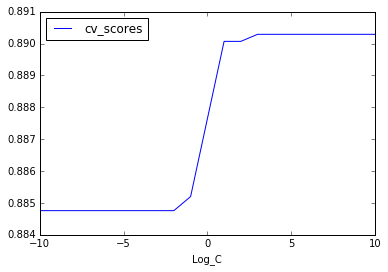

In [15]:
c_list = np.logspace(-10,10,21) 
c_index = np.arange(-10,11)
cv_scores = []
for c in c_list:
    lm = LogisticRegression(C = c)
    cv_scores.append(cross_val_score(lm,standard_x,y,cv=10).mean())
    
C_Choice_df = pd.DataFrame({'cv_scores': cv_scores ,'Log_C': c_index })
print C_Choice_df
C_Choice_df.plot(x ='Log_C',y = 'cv_scores' )

C value of 1 or 2 is ideal

#### Now use the best C you found above and repeat your analysis and look over your coefficients

In [16]:
lm = LogisticRegression(C = 1)
lm.fit(X,y)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [17]:
#It will be easier for you to zip the name of variables and your coefficients
zip(X.columns.values,lm.coef_[0])

[('age', 0.0014419087316419148),
 ('balance', 1.0601821524423129e-05),
 ('duration', 0.0037847654971496594),
 ('campaign', -0.090880601430010519),
 ('pdays', 0.0024274172634546291),
 ('previous', 0.09526267695988952),
 ('marital_single', 0.17076400382384718),
 ('default_yes', 0.13920965501813912),
 ('housing_yes', -0.98924089728876152),
 ('loan_yes', -0.85368305852795545)]

#### If you would like to drop 3 variables from your analysis, which variables are you going to choose?

Answer: I would choose the three variables that have the lowest coefficients. These are balance, duration, and pdays

In [18]:
X.corr() > 0.25

,age,balance,duration,campaign,pdays,previous,marital_single,default_yes,housing_yes,loan_yes
age,True,False,False,False,False,False,False,False,False,False
balance,False,True,False,False,False,False,False,False,False,False
duration,False,False,True,False,False,False,False,False,False,False
campaign,False,False,False,True,False,False,False,False,False,False
pdays,False,False,False,False,True,True,False,False,False,False
previous,False,False,False,False,True,True,False,False,False,False
marital_single,False,False,False,False,False,False,True,False,False,False
default_yes,False,False,False,False,False,False,False,True,False,False
housing_yes,False,False,False,False,False,False,False,False,True,False
loan_yes,False,False,False,False,False,False,False,False,False,True
